In [3]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

In [34]:
# load the images using the URLs in the JSON file. These are for the rock-2.png labelled image.
vein_type_1_binary_mask = imageio.imread("https://imagemasks.s3.amazonaws.com/1d054cf569422959ddedd052/cjg2zgjwa5nps01679m9q77ii_Vein_Type_1_mask.png")
vein_type_2_binary_mask = imageio.imread("https://imagemasks.s3.amazonaws.com/1d054cf569422959ddedd052/cjg2zgjwa5nps01679m9q77ii_Vein_Type_2_mask.png")
vein_type_3_binary_mask = imageio.imread("https://imagemasks.s3.amazonaws.com/1d054cf569422959ddedd052/cjg2zgjwa5nps01679m9q77ii_Vein_Type_3_mask.png")

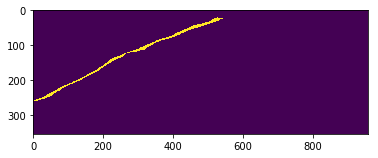

In [35]:
plt.imshow(vein_type_1_binary_mask)

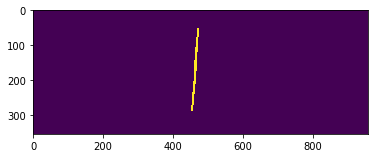

In [36]:
plt.imshow(vein_type_2_binary_mask)

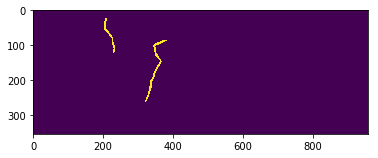

In [37]:
plt.imshow(vein_type_3_binary_mask)

In [5]:
vein_type_1_colour = np.array([0,255,0])     # green
vein_type_2_colour = np.array([0,0,255])     # blue
vein_type_3_colour = np.array([255,127,80])  # orange

In [6]:
vein_type_3_binary_mask.shape

(354, 958)

In [7]:
# convert from 2D grayscale image to 2D multichannel (RGB)
vein_type_1_3ch_mask = np.stack((vein_type_1_binary_mask,)*3, -1)
vein_type_2_3ch_mask = np.stack((vein_type_2_binary_mask,)*3, -1)
vein_type_3_3ch_mask = np.stack((vein_type_3_binary_mask,)*3, -1)

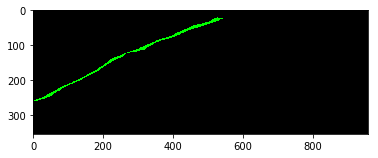

In [33]:
plt.imshow(vein_type_1_3ch_mask)

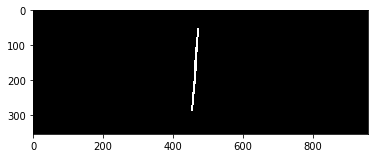

In [9]:
plt.imshow(vein_type_2_3ch_mask)

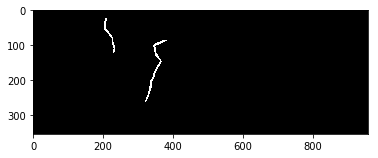

In [10]:
plt.imshow(vein_type_3_3ch_mask)

In [11]:
# find where the pixels are white - doesn't matter which channel we look in, as they are identical
vein_1_rows, vein_1_cols = np.where(vein_type_1_3ch_mask[:,:,1]==255)
vein_2_rows, vein_2_cols = np.where(vein_type_2_3ch_mask[:,:,1]==255)
vein_3_rows, vein_3_cols = np.where(vein_type_3_3ch_mask[:,:,1]==255)

In [12]:
# ... and set those pixels to the colour for that object class
vein_type_1_3ch_mask[vein_1_rows,vein_1_cols,:] = vein_type_1_colour
vein_type_2_3ch_mask[vein_2_rows,vein_2_cols,:] = vein_type_2_colour
vein_type_3_3ch_mask[vein_3_rows,vein_3_cols,:] = vein_type_3_colour

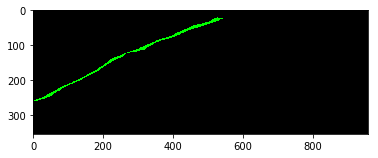

In [13]:
plt.imshow(vein_type_1_3ch_mask)

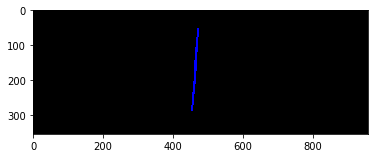

In [14]:
plt.imshow(vein_type_2_3ch_mask)

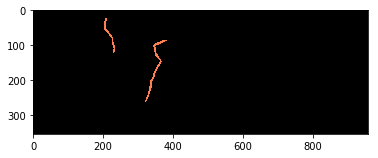

In [15]:
plt.imshow(vein_type_3_3ch_mask)

In [16]:
combined_im = vein_type_1_3ch_mask+vein_type_2_3ch_mask+vein_type_3_3ch_mask

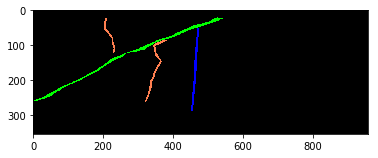

In [17]:
plt.imshow(combined_im)

In [18]:
imageio.imwrite('instance-mask.png', combined_im)

__To create single channel masks used by the Pascal VOC example in DeepLab, the binary masks must be combined into a single-channel image, with the pixel values corresponding to the label number.

In [70]:
rock_2_mask = np.zeros(vein_type_1_binary_mask.shape, dtype=np.uint8)

In [71]:
type_1_value = 1
type_2_value = 2
type_3_value = 15

vein_1_rows, vein_1_cols = np.where(vein_type_1_binary_mask==255)
vein_2_rows, vein_2_cols = np.where(vein_type_2_binary_mask==255)
vein_3_rows, vein_3_cols = np.where(vein_type_3_binary_mask==255)

rock_2_mask[vein_1_rows, vein_1_cols] = type_1_value
rock_2_mask[vein_2_rows, vein_2_cols] = type_2_value
rock_2_mask[vein_3_rows, vein_3_cols] = type_3_value

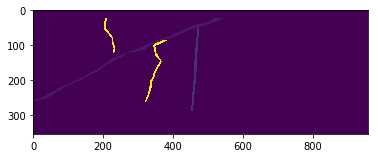

In [72]:
plt.imshow(rock_2_mask)

In [79]:
imageio.imwrite('rock_2_mask.png', rock_2_mask)

In [80]:
t = imageio.imread('rock_2_mask.png')

In [81]:
np.unique(t)

Image([ 0,  1,  2, 15], dtype=uint8)